## 神经网络基础

### 激活函数
- 用来判断所计算的信息是否达到了往后面传输的条件
- 为什么激活函数是非线性的？
     - 神经网络计算过程中，每层都相当于矩阵相乘，无论有多少层输出都是输入的线性组合，即使是几千层的计算，无非还是矩阵相乘，和一层聚会着呢相乘信息差距不大，所有需要激活函数引入非线性因素，使得神经网络1可以任意逼近任何非线性函数，这样可以增加神经网络模型泛化的特性

In [2]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
x=torch.linspace(-10,10,60) # -10到10分成等距的60个点
x

tensor([-10.0000,  -9.6610,  -9.3220,  -8.9831,  -8.6441,  -8.3051,  -7.9661,
         -7.6271,  -7.2881,  -6.9492,  -6.6102,  -6.2712,  -5.9322,  -5.5932,
         -5.2542,  -4.9153,  -4.5763,  -4.2373,  -3.8983,  -3.5593,  -3.2203,
         -2.8814,  -2.5424,  -2.2034,  -1.8644,  -1.5254,  -1.1864,  -0.8475,
         -0.5085,  -0.1695,   0.1695,   0.5085,   0.8475,   1.1864,   1.5254,
          1.8644,   2.2034,   2.5424,   2.8814,   3.2203,   3.5593,   3.8983,
          4.2373,   4.5763,   4.9153,   5.2542,   5.5932,   5.9322,   6.2712,
          6.6102,   6.9492,   7.2881,   7.6271,   7.9661,   8.3051,   8.6441,
          8.9831,   9.3220,   9.6610,  10.0000])

### sigmoid函数

- $a=\frac{1}{1+e^{-z}}$，导数为$a^\prime=a(1-a)$
- sigmoid函数输出在(0,1)这个开区间，它能够把输入的连续实值变换为0-1之间的输出；如果是非常大的负数，输出就是0；非常大的正数，输出就是1，起到抑制的作用

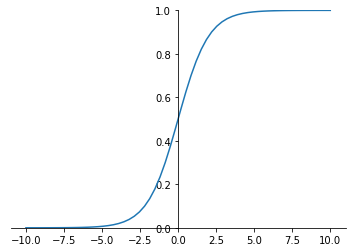

In [5]:
ax=plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
plt.ylim((0,1))
sigmoid=torch.sigmoid(x)
plt.plot(x.numpy(),sigmoid.numpy())

- sigmoid需要进行指数运算，相对来说较慢。
- sigmoid函数反向传播时，容易出现梯度消失的情况。在sigmoid接近饱和区时，变换太缓慢，导数趋于0，容易造成信息丢失。
- 很少直接使用sigmoid，基本上只有在二分类0、1的输出层才会使用

### tanh函数

- $a=\frac{e^z-e^{-z}}{e^z+e^z}$,导数: $a^\prime=1-a^2$
- 双曲正切曲线，输出区间在(-1,1)之间，而且整个函数以0位中心

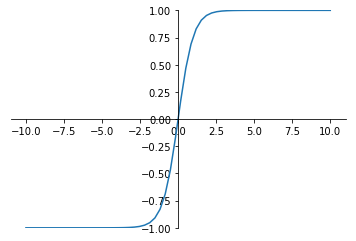

In [6]:
ax=plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
plt.ylim((-1,1))
tanh=torch.tanh(x)
plt.plot(x.numpy(),tanh.numpy())

- 与sigmoid函数类似，梯度还是容易出现很小的情况
- 解决了zero-centered的输出问题

### ReLU函数

- Relu(Rectified Linear Units) 修正线性单元
- $a=max(0,z)$; 导数大于0时时1，小于0时为0

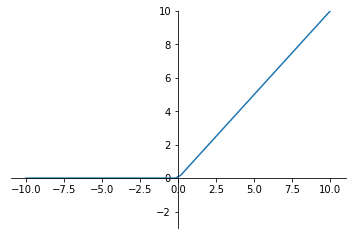

In [8]:
ax=plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
plt.ylim((-3,10))
relu=F.relu(x)
plt.plot(x.numpy(),relu.numpy())

- 输入为负数时，ReLu完全不会被激活。实际影响不是很大

### Leak Relu函数

- 用来解决relu函数中z<0的问题。$a=max(\alpha z,z)$,$\alpha$通常设为0.01

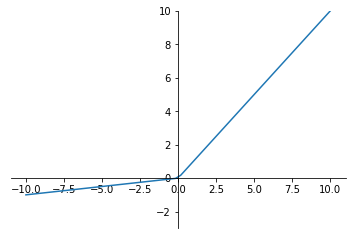

In [12]:
ax=plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['top'].set_position(('data',0))
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))
plt.ylim((-3, 10))
l_relu=F.leaky_relu(x,0.1) # 这里的0.1是为了方便展示，理论上应为0.01甚至更小的值
plt.plot(x.numpy(),l_relu.numpy())

## 正向传播和反向传播

In [ ]:
- 正向传播: 输入的x通过一系列的网络计算，得到输出y的过程
- 反向传播: 反向计算梯度，通过学习率优化需要训练的参数